In [38]:
#importing all libraries used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve , PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
#reading training and testig files
df_train = pd.read_csv("UNSW_NB15_training-set.csv")
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")

In [40]:
df_train.shape

(175341, 45)

In [41]:
df_test.shape

(82332, 45)

In [42]:
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  175341
Length of testing set:  82332


In [43]:
#Concatenation
df = pd.concat([df_train, df_test])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [45]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [46]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [47]:
#Checking duplicates

print(df.duplicated().sum())

0


In [48]:
#Checking missing values

print(df.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<Axes: xlabel='label'>

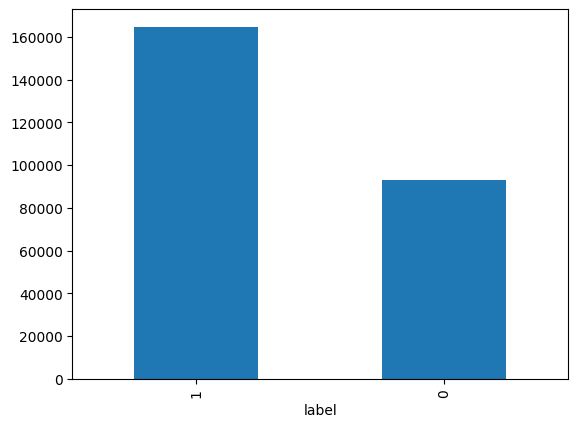

In [49]:
df['label'].value_counts().plot.bar()

In [50]:
#Ratio between attacks and normals      so imbalanced data , 1:attack and 0:normal
df['label'].value_counts(normalize=True)

,proportion
label,
1,0.639077
0,0.360923


In [51]:
#Dropping unnecessary features
df = df.drop(columns=['id', 'attack_cat'])

In [52]:
#label encoding
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [53]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


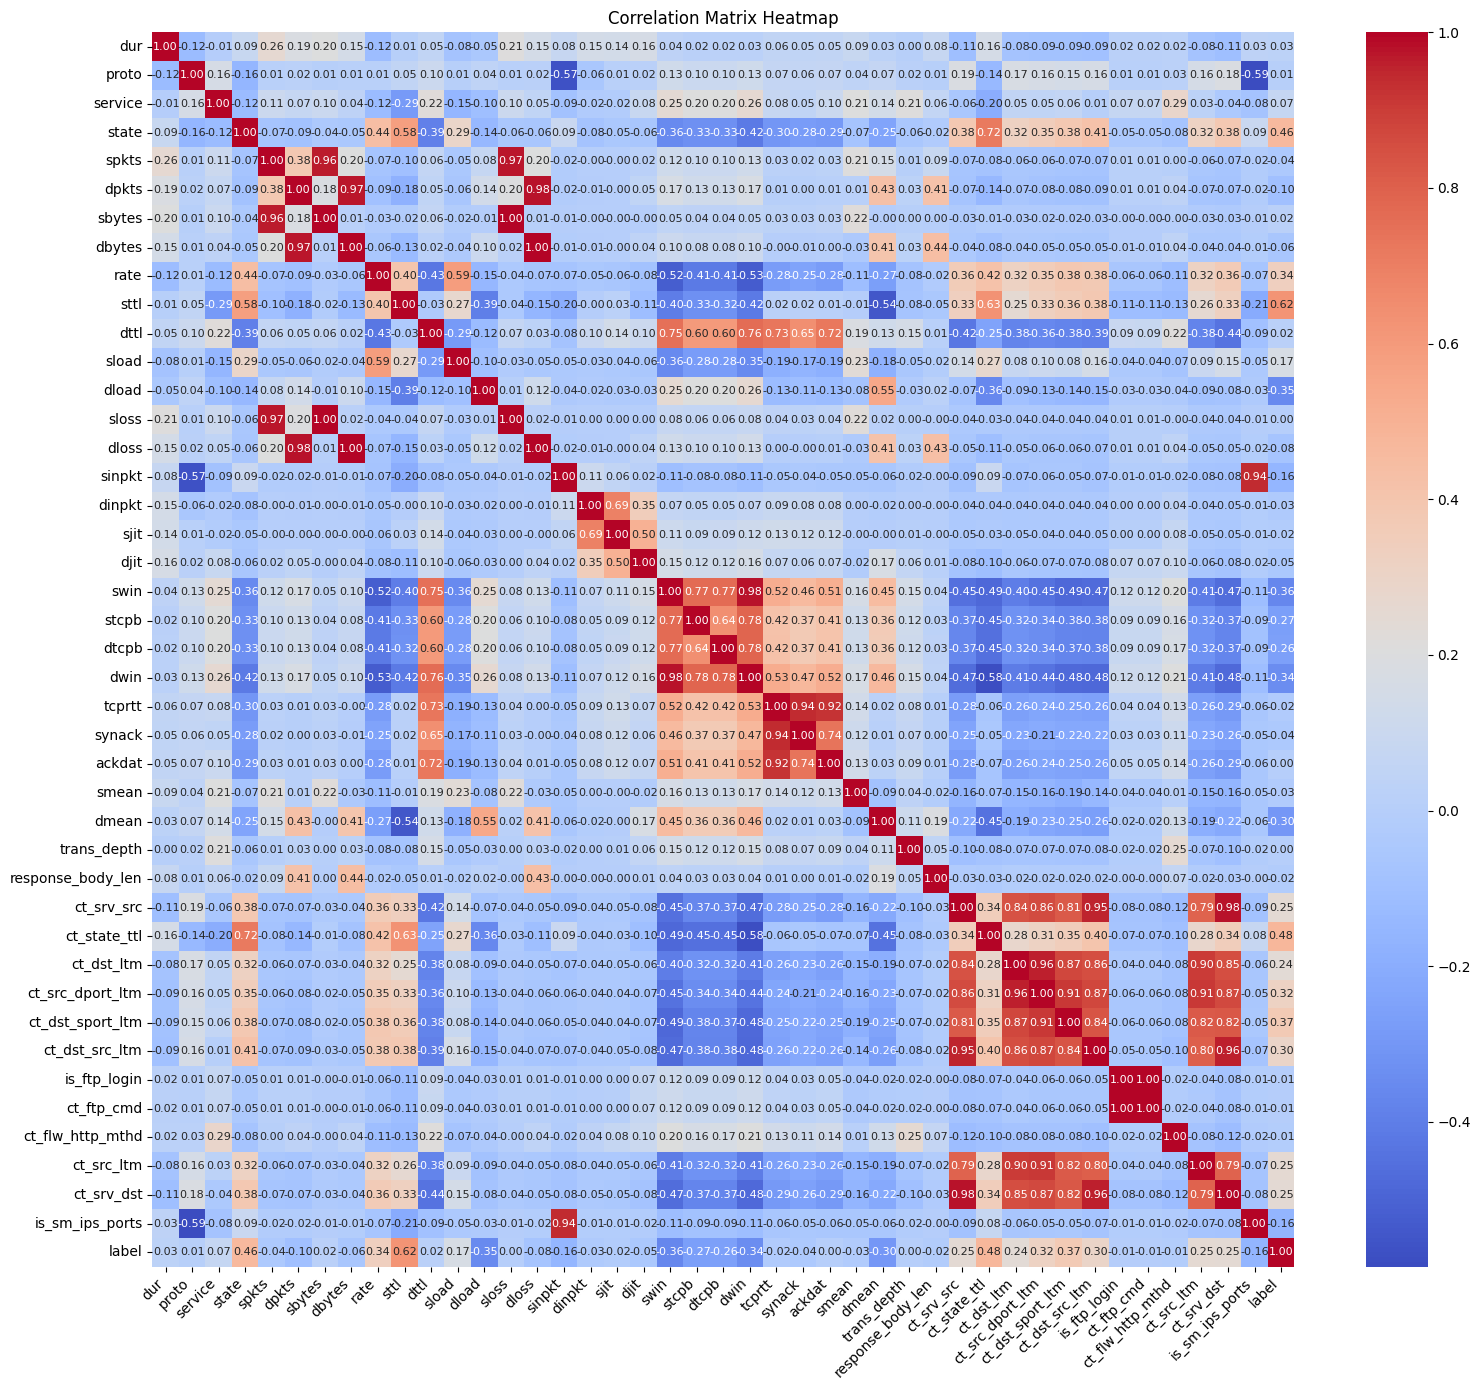

In [54]:
#Correlation

plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={"size":8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


In [55]:
#Columns with high correlation
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.9957715772406667
dbytes dloss 0.996711133831455
swin dwin 0.9804584289136496
is_ftp_login ct_ftp_cmd 0.9988554882935726


In [56]:
#removed these columns
df = df.drop(columns=correlated_vars)

In [57]:
#Spliting to train and test
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [58]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


In [59]:
#Scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
#train on 10000 samples only
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_scaled, y_train, train_size=10000, random_state=42, stratify=y_train
)

In [61]:
!pip install xgboost

In [62]:
#Multi Models
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['Support Vector Machine'] = SVC(kernel='rbf', probability=True)
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=5)
models['Logistic Regression'] = LogisticRegression(max_iter=1000)
models['Gradient Boosting'] = GradientBoostingClassifier()
models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [63]:
train_score, test_score, accuracy, precision, recall, f1, cv_accuracy, y_pred = {}, {}, {}, {}, {}, {} , {}, {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    start = time.time()

    model.fit(X_train_sample, y_train_sample)

    end = time.time()
    print(f"{name} training done in {end - start:.2f} seconds")

    y_pred[name] = model.predict(X_test_scaled)
    train_score[name] = model.score(X_train_sample, y_train_sample)
    test_score[name] = model.score(X_test_scaled, y_test)

    accuracy[name] = accuracy_score(y_test, y_pred[name])
    precision[name] = precision_score(y_test, y_pred[name], average='weighted', zero_division=0)
    recall[name] = recall_score(y_test, y_pred[name], average='weighted')
    f1[name] = f1_score(y_test, y_pred[name], average='weighted')


Training model: Decision Tree Classifier
Decision Tree Classifier training done in 0.14 seconds

Training model: Random Forest Classifier
Random Forest Classifier training done in 2.01 seconds

Training model: Gaussian Naive Bayes
Gaussian Naive Bayes training done in 0.00 seconds

Training model: Support Vector Machine
Support Vector Machine training done in 11.69 seconds

Training model: K-Nearest Neighbors
K-Nearest Neighbors training done in 0.00 seconds

Training model: Logistic Regression
Logistic Regression training done in 0.05 seconds

Training model: Gradient Boosting
Gradient Boosting training done in 3.90 seconds

Training model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:37:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost training done in 0.26 seconds


In [64]:
# cross-validation accuracy and classification report

cv_accuracy = {}
for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.fit(X_train_sample, y_train_sample)

    y_pred[name] = model.predict(X_test_scaled)

    #cross-validation
    scores = cross_val_score(model, X_train_sample, y_train_sample, cv=5, scoring='accuracy')
    cv_accuracy[name] = scores.mean()
    print(f"Mean CV Accuracy: {cv_accuracy[name]:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred[name], zero_division=0))



Training model: Decision Tree Classifier
Mean CV Accuracy: 0.9127
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     28069
           1       0.93      0.93      0.93     49233

    accuracy                           0.91     77302
   macro avg       0.91      0.91      0.91     77302
weighted avg       0.91      0.91      0.91     77302


Training model: Random Forest Classifier
Mean CV Accuracy: 0.9318
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     28069
           1       0.94      0.96      0.95     49233

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302


Training model: Gaussian Naive Bayes
Mean CV Accuracy: 0.8357
Classification Report:
              precision    recall  f1-score   support

           0       0.85  

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:38:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:38:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:38:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:38:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:38:12] WARNING: /w

Mean CV Accuracy: 0.9295
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     28069
           1       0.94      0.95      0.95     49233

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302



In [65]:
rfc_rfe = 'Random Forest Classifier + Recursive Feature Elimination'
models[rfc_rfe] = RandomForestClassifier()

# start timing
start_time = time.time()

#select 10 features
rfe = RFE(models[rfc_rfe], n_features_to_select=10)
#training
rfe.fit(X_train_sample, y_train_sample)
#Convertion
X_train_rfe = rfe.transform(X_train_sample)
X_test_rfe = rfe.transform(X_test_scaled)
# Training on new data
models[rfc_rfe].fit(X_train_rfe, y_train_sample)

# end timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time on sample: {elapsed_time:.2f} seconds")

# estimate full training time
sample_rows = len(X_train_sample)
total_rows = len(X_train)
estimated_time = (total_rows / sample_rows) * elapsed_time
print(f"Estimated total training time on full data: {estimated_time:.2f} seconds")

#predicion on new data
y_pred[rfc_rfe] = models[rfc_rfe].predict(X_test_rfe)
#determination of parameters
train_score[rfc_rfe] = models[rfc_rfe].score(X_train_rfe, y_train_sample)
accuracy[rfc_rfe] = accuracy_score(y_test, y_pred[rfc_rfe])
precision[rfc_rfe] = precision_score(y_test, y_pred[rfc_rfe], average='weighted', zero_division=0)
recall[rfc_rfe] = recall_score(y_test, y_pred[rfc_rfe], average='weighted')
f1[rfc_rfe] = f1_score(y_test, y_pred[rfc_rfe], average='weighted')


Elapsed time on sample: 36.16 seconds
Estimated total training time on full data: 652.30 seconds


In [66]:
print("Old number of features:", X.shape[1])
print("New number of features:", len(rfe.estimator_.feature_importances_))

Old number of features: 38
New number of features: 10


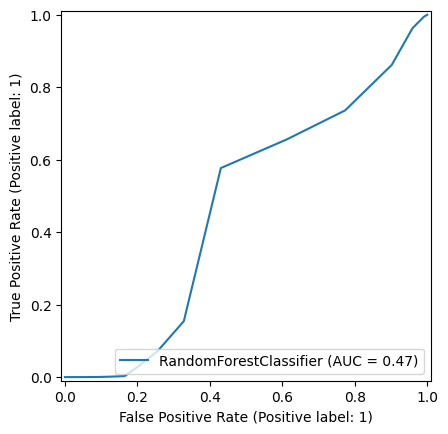

In [67]:
#ROC Curve
display = RocCurveDisplay.from_estimator(models['Random Forest Classifier'], X_test, y_test)
plt.show()

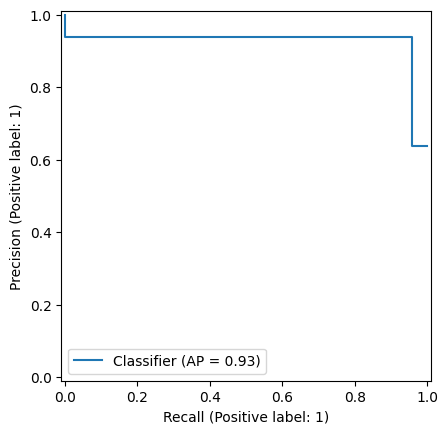

In [68]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred['Random Forest Classifier'])

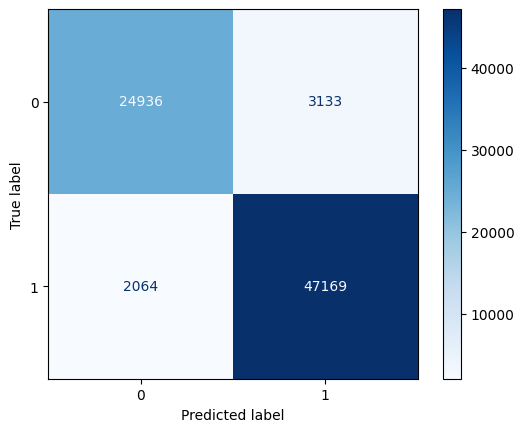

In [69]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

In [70]:
#Models comparison
df_models = pd.DataFrame(index=models.keys(), columns=[
    'Training score', 'Test score', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Accuracy'])

for model_name in models.keys():
    df_models.loc[model_name, 'Training score'] = train_score.get(model_name, None)
    df_models.loc[model_name, 'Test score'] = test_score.get(model_name, None)
    df_models.loc[model_name, 'Accuracy'] = accuracy.get(model_name, None)
    df_models.loc[model_name, 'Precision'] = precision.get(model_name, None)
    df_models.loc[model_name, 'Recall'] = recall.get(model_name, None)
    df_models.loc[model_name, 'F1-Score'] = f1.get(model_name, None)
    df_models.loc[model_name, 'CV Accuracy'] = cv_accuracy.get(model_name, None)

In [71]:
print("\nFinal Model Comparison:")
df_models


Final Model Comparison:


,Training score,Test score,Accuracy,Precision,Recall,F1-Score,CV Accuracy
Decision Tree Classifier,0.9995,0.91431,0.91431,0.914386,0.91431,0.914346,0.9127
Random Forest Classifier,0.9995,0.932162,0.932162,0.931955,0.932162,0.931879,0.9318
Gaussian Naive Bayes,0.8389,0.831065,0.831065,0.83278,0.831065,0.825376,0.8357
Support Vector Machine,0.9104,0.90162,0.90162,0.910132,0.90162,0.89822,0.9035
K-Nearest Neighbors,0.9353,0.9003,0.9003,0.8998,0.9003,0.899846,0.8985
Logistic Regression,0.9041,0.89541,0.89541,0.899475,0.89541,0.892669,0.9022
Gradient Boosting,0.9435,0.930118,0.930118,0.929916,0.930118,0.929783,0.9323
XGBoost,0.9939,0.931878,0.931878,0.93166,0.931878,0.931678,0.9295
Random Forest Classifier + Recursive Feature Elimination,0.9965,None,0.922719,0.922439,0.922719,0.922353,None


In [72]:
best_model_name = max(accuracy, key=accuracy.get)
best_accuracy = accuracy[best_model_name]

print(f"Best model: {best_model_name} with accuracy = {best_accuracy:.4f}")

Best model: Random Forest Classifier with accuracy = 0.9322


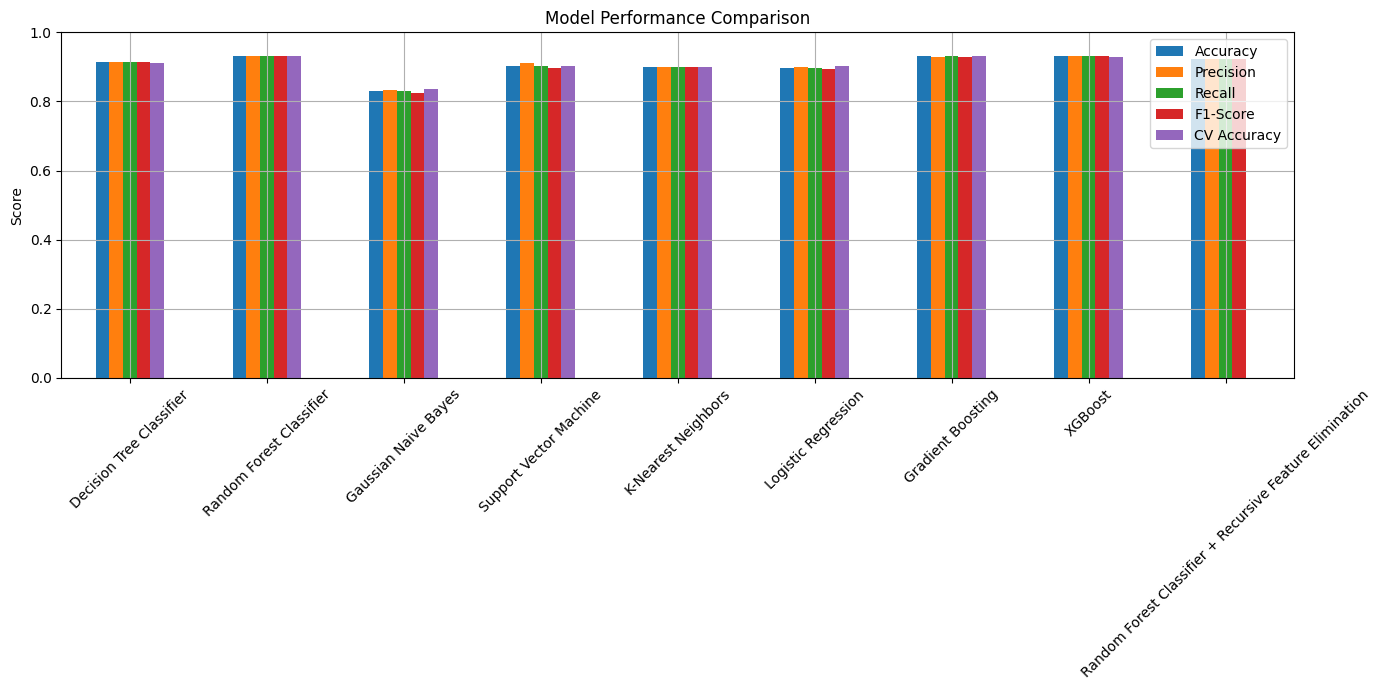

In [73]:
df_models[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Accuracy']].plot(kind='bar', figsize=(14, 7))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()